In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
ipl_data = pd.read_csv('F:/Downloads/capstone_ipl_tilldate.csv')
ipl_data.info()

C:\Users\JAYASURYA PAVAN\AppData\Local\Temp\ipykernel_2680\2397483411.py:1: DtypeWarning: Columns (7,9,22,23,39,40,52,54,55,56,64,66,67,69,70,72,73,74,75,76,77,78,79,80,81) have mixed types. Specify dtype option on import or set low_memory=False.
  ipl_data = pd.read_csv('F:/Downloads/capstone_ipl_tilldate.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126855 entries, 0 to 126854
Data columns (total 82 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   city                  120350 non-null  object 
 1   dates                 126855 non-null  object 
 2   event_match_number    119104 non-null  float64
 3   outcome_by_runs       35120 non-null   float64
 4   winner                126706 non-null  object 
 5   overs                 126855 non-null  int64  
 6   player_of_match       124804 non-null  object 
 7   season                71940 non-null   object 
 8   toss_decision         121499 non-null  object 
 9   toss_winner           76405 non-null   object 
 10  venue                 126855 non-null  object 
 11  innings_team          126855 non-null  object 
 12  overs_over            20280 non-null   float64
 13  deliveries_batter     126001 non-null  object 
 14  bowler                126001 non-null  object 
 15  

# Data Cleaning

In [3]:
# Check for missing values
missing_values = ipl_data.isnull().sum()
print(missing_values)

city                    6505
dates                      0
event_match_number      7751
outcome_by_runs        91735
winner                   149
                       ...  
umpires_call          126770
review_by.1           126701
umpire.1              126701
batter.1              126701
decision.1            126701
Length: 82, dtype: int64


In [7]:
# ipl_data['runs_batter'] = ipl_data['runs_batter'].fillna(ipl_data['batter'])
# ipl_data['runs_batter.1'] = ipl_data['runs_batter.1'].fillna(ipl_data['batter.1'])
# ipl_data[ipl_data['batter'].notnull()]['batter']
match_data = ipl_data.iloc[:,11:49]
match_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126855 entries, 0 to 126854
Data columns (total 38 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   innings_team         126855 non-null  object 
 1   overs_over           20280 non-null   float64
 2   deliveries_batter    126001 non-null  object 
 3   bowler               126001 non-null  object 
 4   non_striker          126001 non-null  object 
 5   runs_batter          126001 non-null  float64
 6   extras               126001 non-null  float64
 7   total                126001 non-null  float64
 8   extras_wides         3753 non-null    float64
 9   legbyes              1637 non-null    float64
 10  noballs              695 non-null     float64
 11  wickets_kind         3866 non-null    object 
 12  player_out           3866 non-null    object 
 13  fielders_name        4840 non-null    object 
 14  powerplays_from      126855 non-null  float64
 15  to               

In [10]:
more_columns = ['byes', 'byes.1', 'wickets_player_out', 'wickets_player_out.1', 'extras_legbyes', 'extras_legbyes.1', 'wides', 'wides.1', 'extras_noballs']

# match_data['runs_batter.1'] = match_data['runs_batter.1'].fillna(match_data['batter.1'])

add_columns = ipl_data.loc[:, more_columns]
match_data = pd.concat([match_data, add_columns], axis = 1)
match_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126855 entries, 0 to 126854
Data columns (total 47 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   innings_team          126855 non-null  object 
 1   overs_over            20280 non-null   float64
 2   deliveries_batter     126001 non-null  object 
 3   bowler                126001 non-null  object 
 4   non_striker           126001 non-null  object 
 5   runs_batter           126001 non-null  float64
 6   extras                126001 non-null  float64
 7   total                 126001 non-null  float64
 8   extras_wides          3753 non-null    float64
 9   legbyes               1637 non-null    float64
 10  noballs               695 non-null     float64
 11  wickets_kind          3866 non-null    object 
 12  player_out            3866 non-null    object 
 13  fielders_name         4840 non-null    object 
 14  powerplays_from       126855 non-null  float64
 15  

# Summary Statistics

In [11]:
# Summary statistics for numeric columns
numeric_summary = match_data.describe()
print(numeric_summary)

         overs_over    runs_batter         extras          total  \
count  20280.000000  126001.000000  126001.000000  126001.000000   
mean       9.441568       1.262323       0.067317       1.329640   
std        5.750996       1.629701       0.341158       1.616893   
min        0.000000       0.000000       0.000000       0.000000   
25%        4.000000       0.000000       0.000000       0.000000   
50%        9.000000       1.000000       0.000000       1.000000   
75%       14.000000       1.000000       0.000000       1.000000   
max       19.000000       6.000000       5.000000       7.000000   

       extras_wides      legbyes     noballs  powerplays_from             to  \
count   3753.000000  1637.000000  695.000000     1.268550e+05  126855.000000   
mean       1.211031     1.270006    1.025899     1.000000e-01       5.604255   
std        0.806897     0.804426    0.250457     2.255982e-13       0.200053   
min        1.000000     1.000000    1.000000     1.000000e-01      

In [14]:
# Unique values for categorical columns

# Selecting categorical columns
categorical_columns = match_data.select_dtypes(include='object').columns.tolist()

for col in categorical_columns:
    unique_vals = match_data[col].unique()
    print(f"Unique values for {col}: {unique_vals}")
 

Unique values for innings_team: ['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Deccan Chargers' 'Kings XI Punjab'
 'Royal Challengers Bangalore' 'Delhi Daredevils' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Rising Pune Supergiants'
 'Gujarat Lions' 'Rising Pune Supergiant' 'Delhi Capitals' 'Punjab Kings'
 'Lucknow Super Giants' 'Gujarat Titans']
Unique values for deliveries_batter: ['SC Ganguly' 'BB McCullum' 'RT Ponting' 'DJ Hussey' 'Mohammad Hafeez'
 'PA Patel' 'ML Hayden' 'MEK Hussey' 'MS Dhoni' 'SK Raina' 'JDP Oram'
 'S Badrinath' 'T Kohli' 'YK Pathan' 'SR Watson' 'M Kaif' 'DS Lehmann'
 'RA Jadeja' 'M Rawat' 'D Salunkhe' 'SK Warne' 'SK Trivedi' 'L Ronchi'
 'ST Jayasuriya' 'DJ Thornely' 'RV Uthappa' 'PR Shah' 'AM Nayar'
 'SM Pollock' 'Harbhajan Singh' 'AC Gilchrist' 'Y Venugopal Rao'
 'VVS Laxman' 'A Symonds' 'RG Sharma' 'SB Styris' 'AS Yadav' 'SB Bangar'
 'WPUJC Vaas' 'RP Singh' nan 'K Goel' 'JR Hopes' 'KC Sangakkara'
 'DPMD

# Univariate Analysis

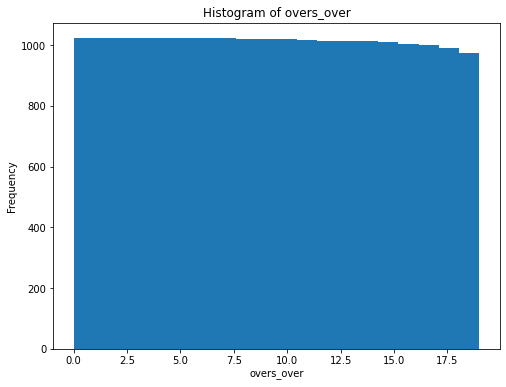

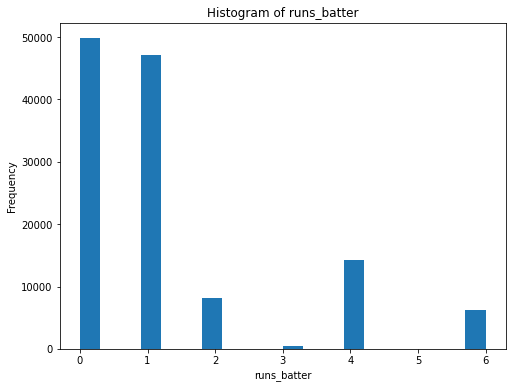

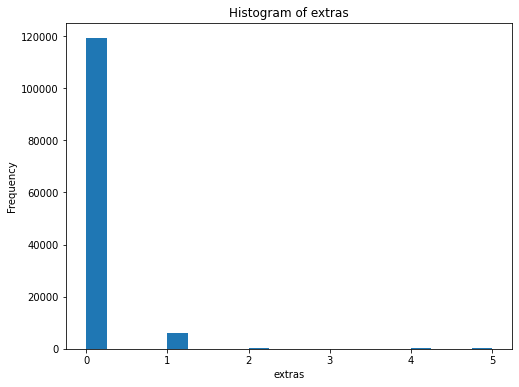

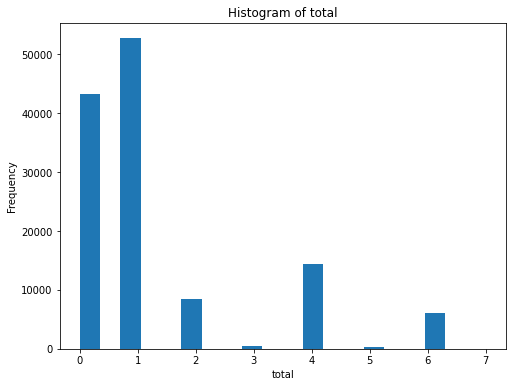

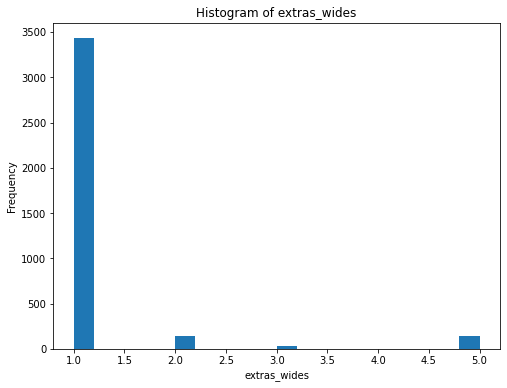

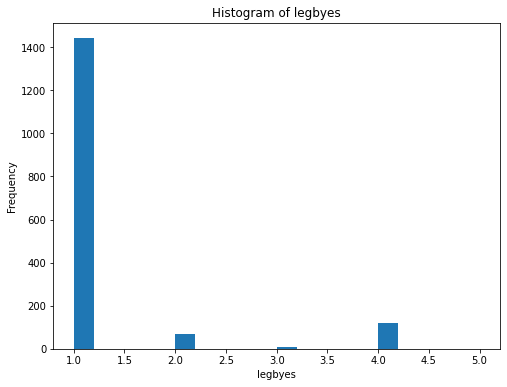

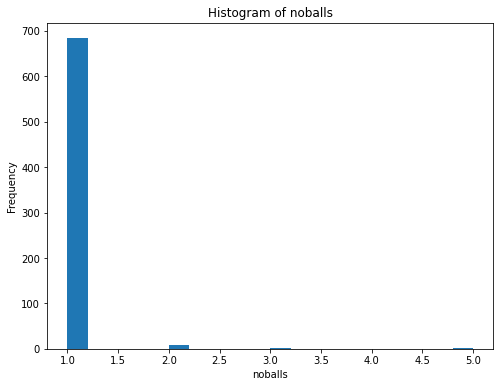

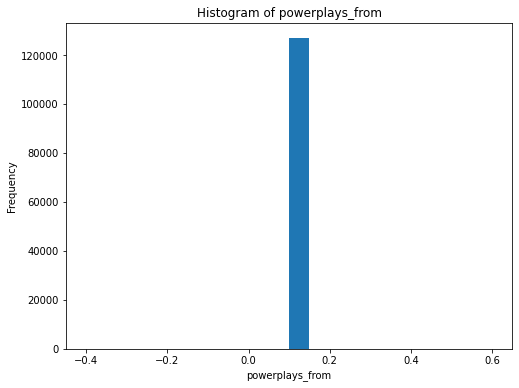

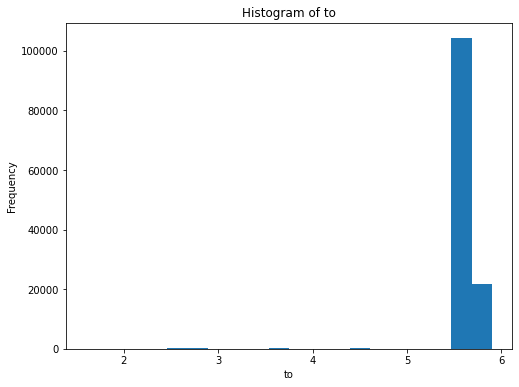

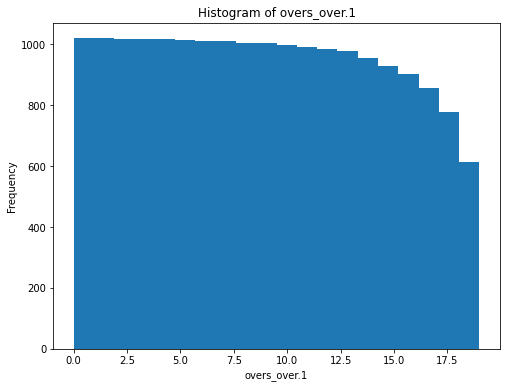

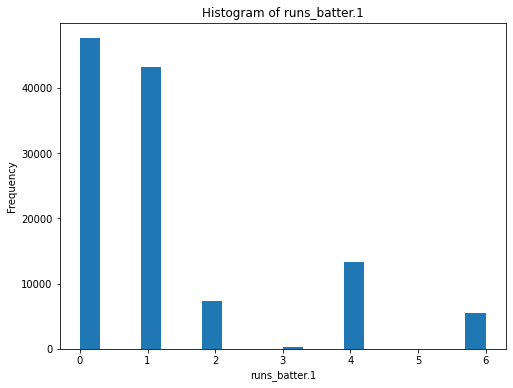

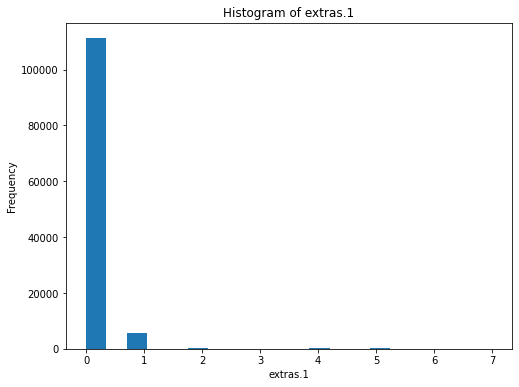

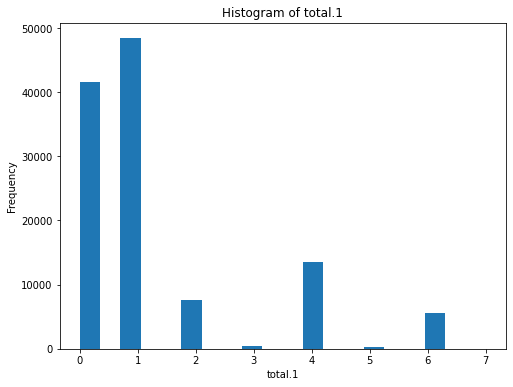

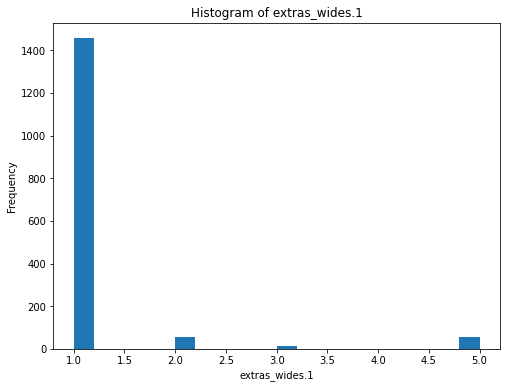

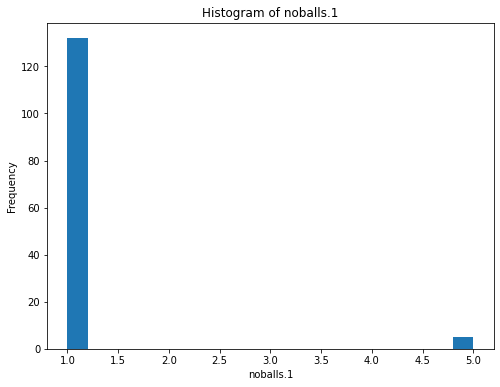

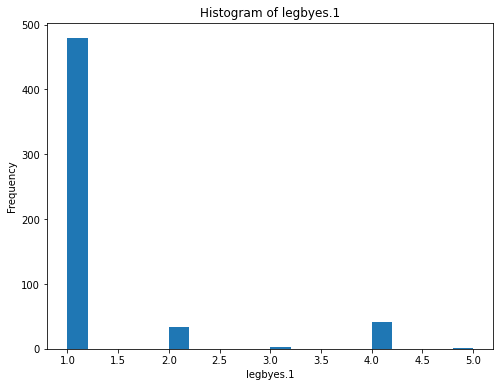

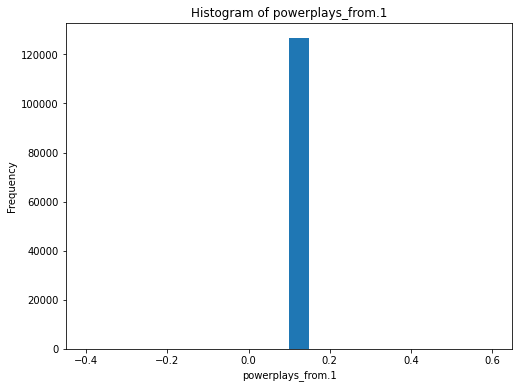

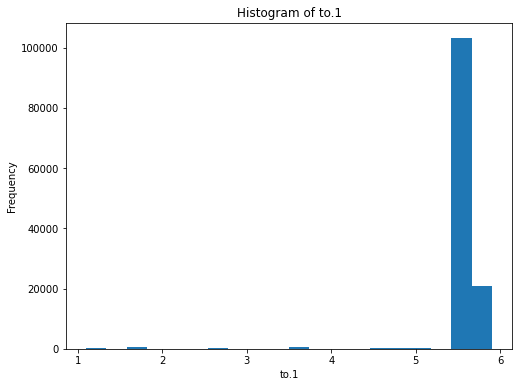

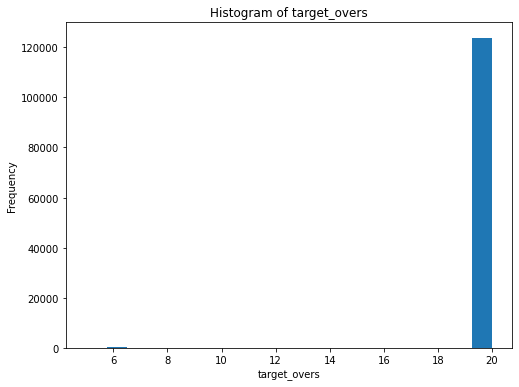

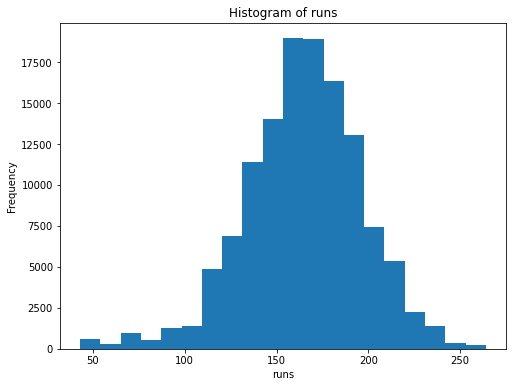

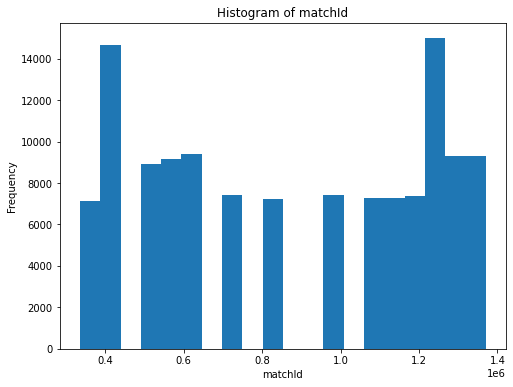

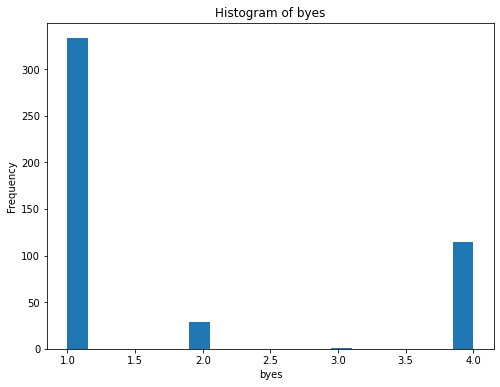

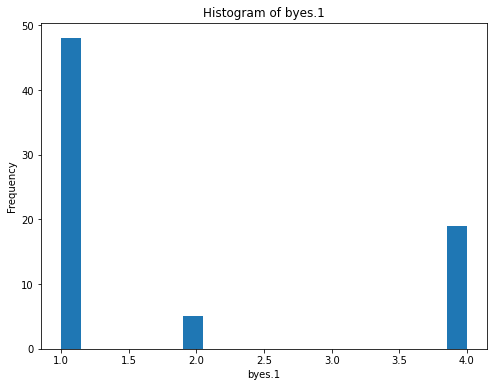

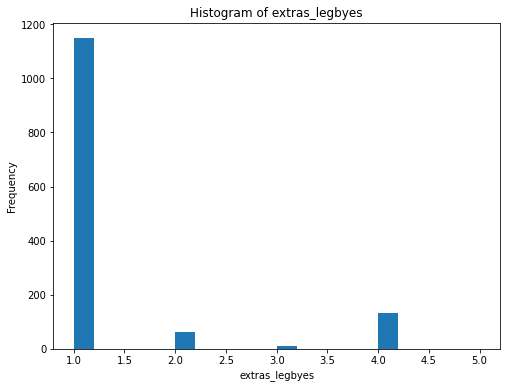

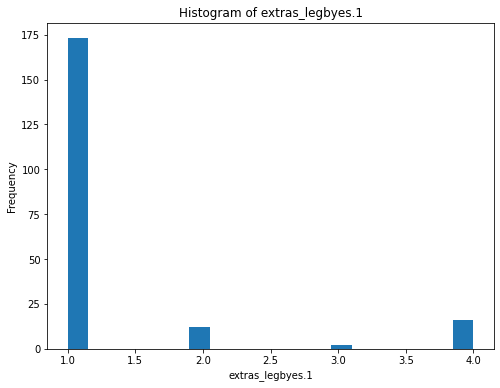

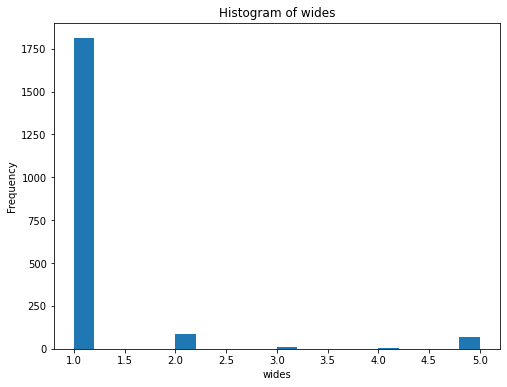

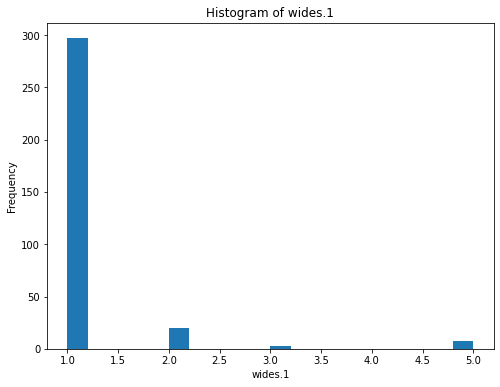

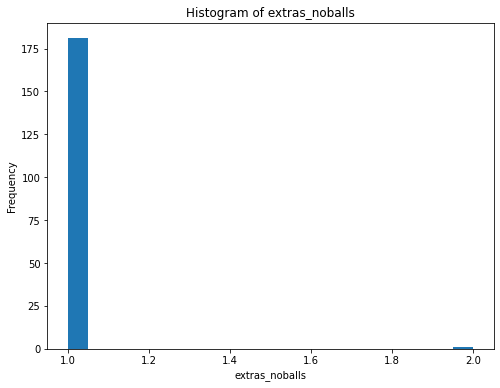

In [16]:
# Histograms for numerical columns
numeric_columns = match_data.select_dtypes(include='number').columns
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(ipl_data[col].dropna(), bins=20)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

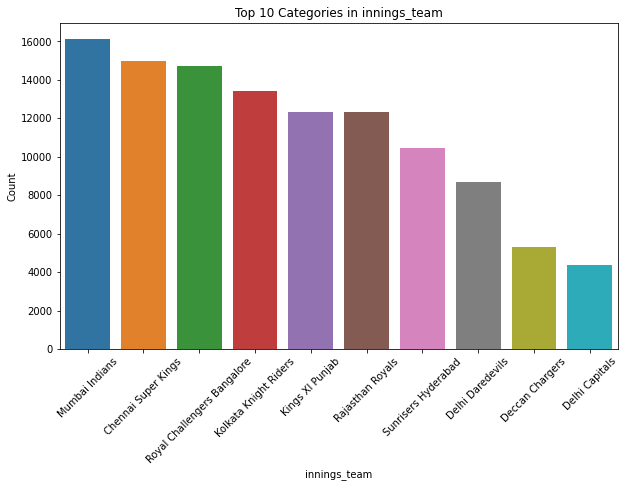

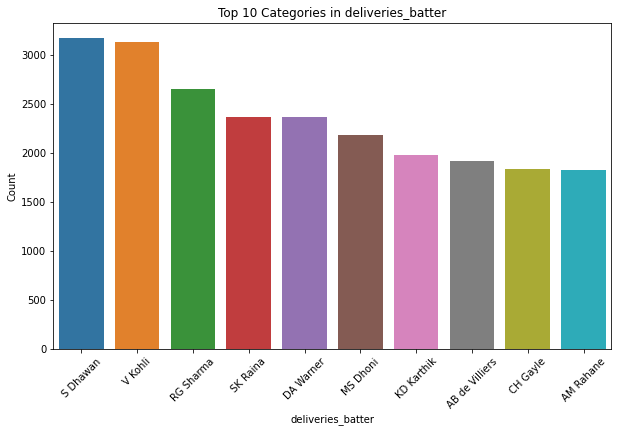

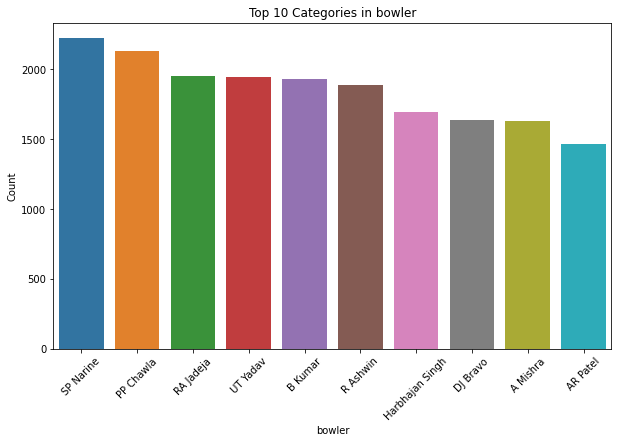

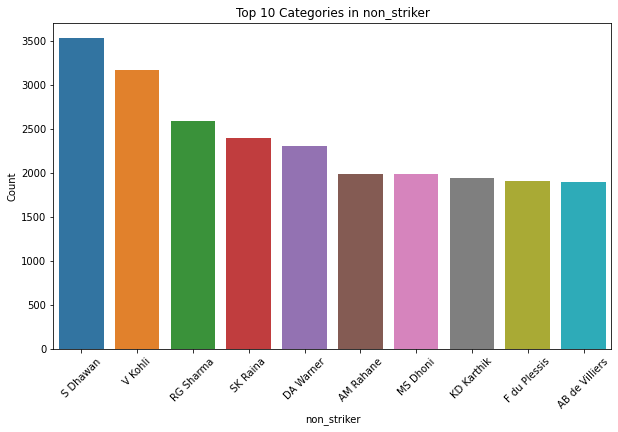

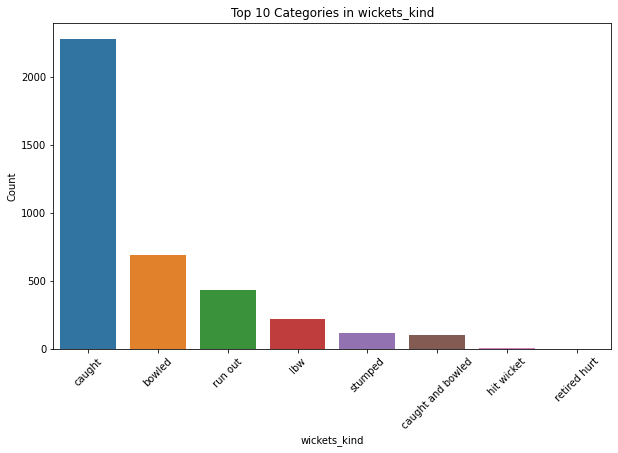

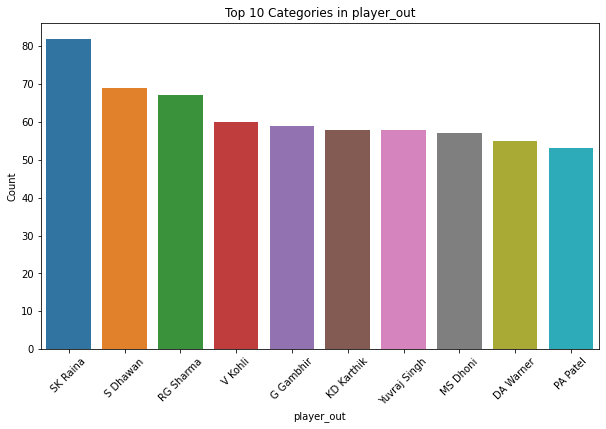

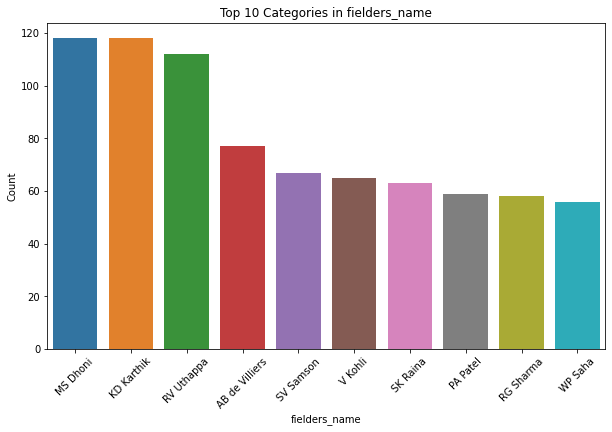

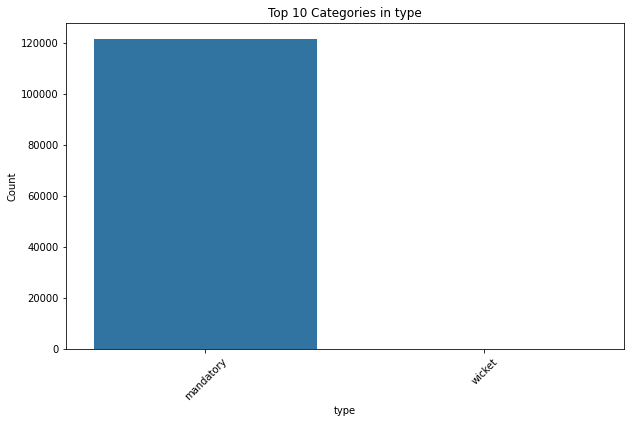

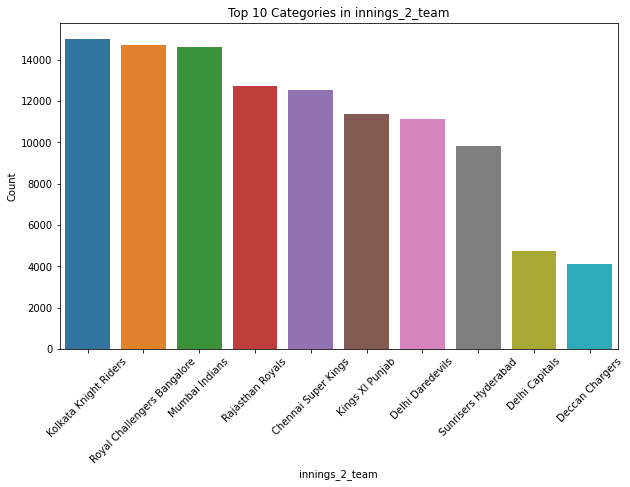

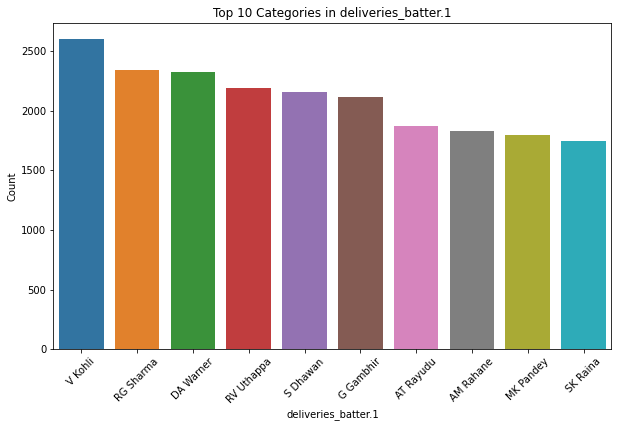

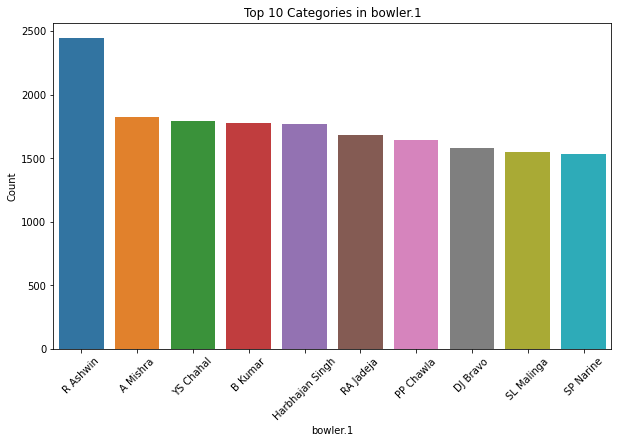

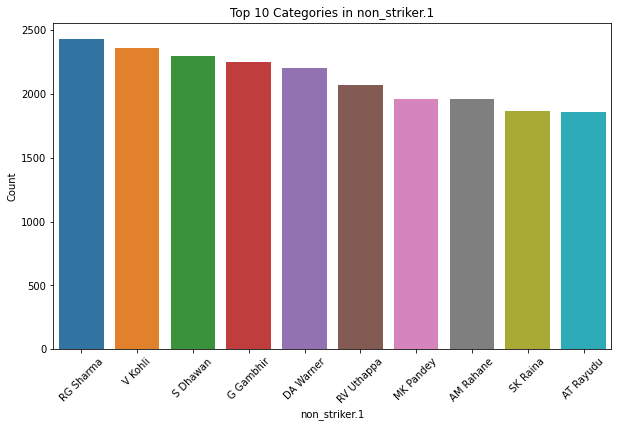

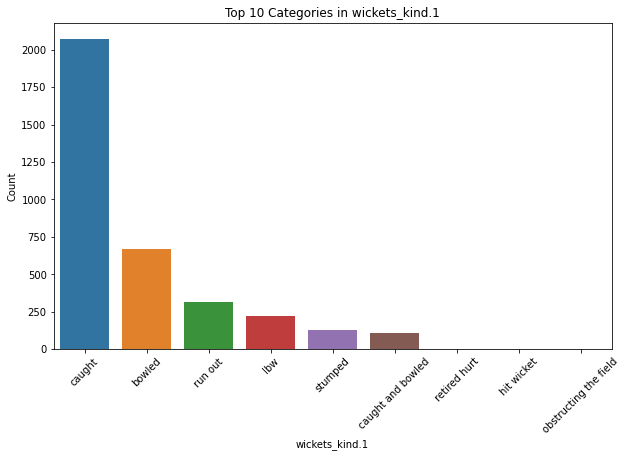

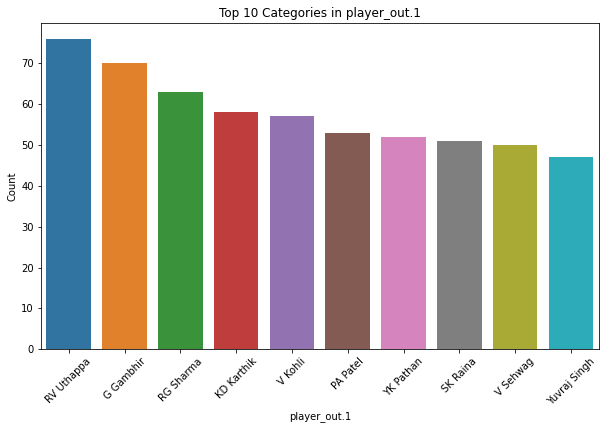

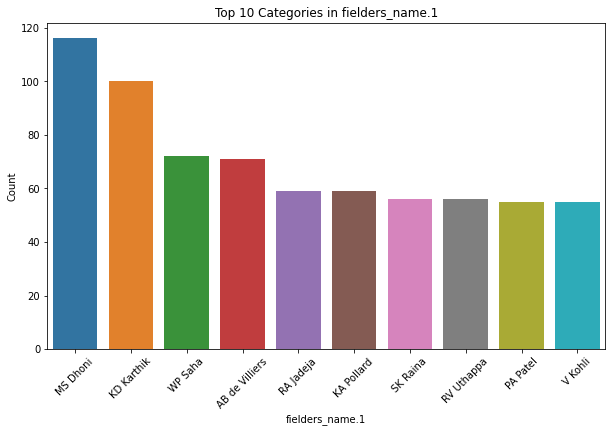

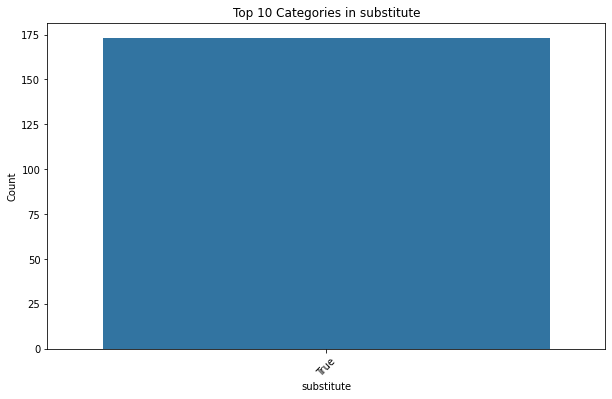

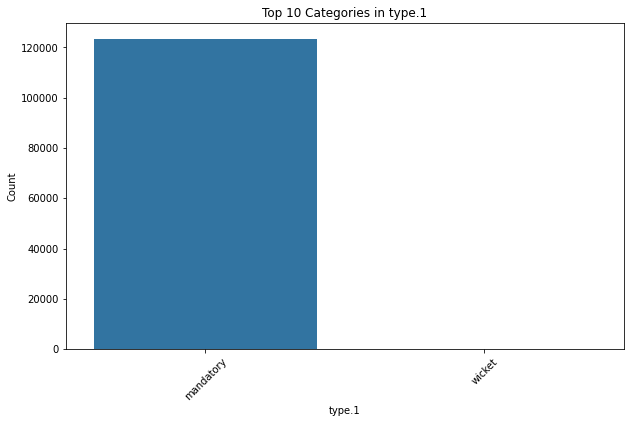

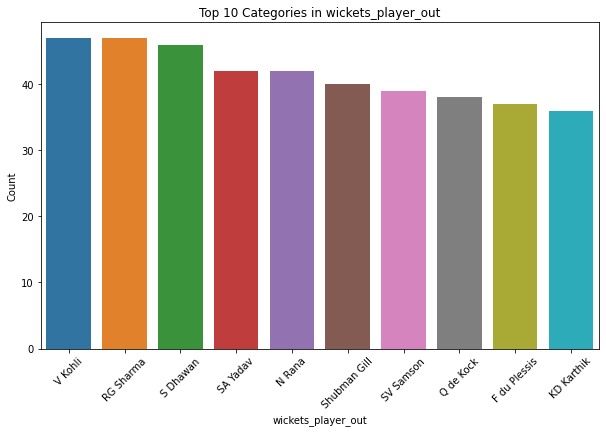

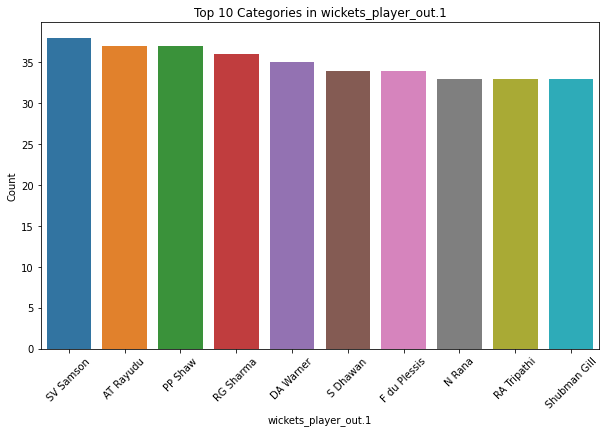

In [17]:
# Count plots for categorical columns
# categorical_columns = ['city', 'winner', 'venue', 'innings_team', ]  # List all categorical columns
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    
    # Compute value counts for the column
    value_counts = match_data[col].value_counts().sort_values(ascending=False)
    
    # Select the top 10 categories
    top_10 = value_counts.head(10)
    
    # Plot the top 10 categories
    sns.barplot(x=top_10.index, y=top_10.values)
    plt.title(f'Top 10 Categories in {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


# Bivariate Analysis

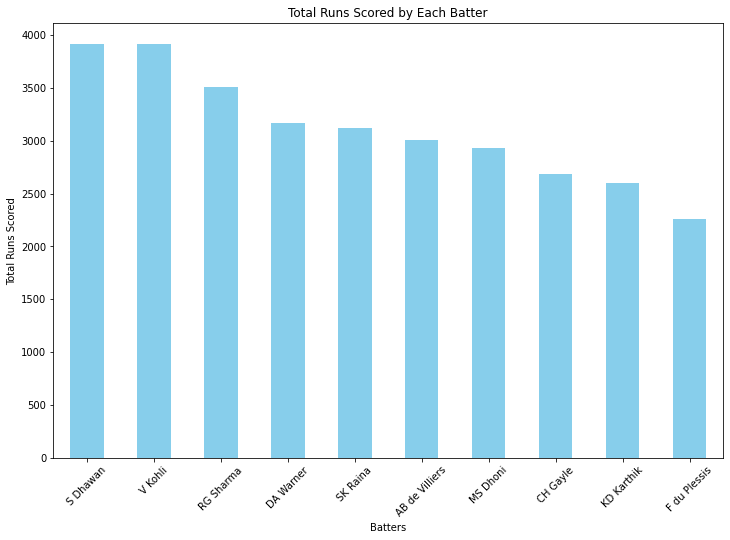

In [24]:
# Grouping data by 'deliveries_batter' and summing 'runs_batter'
runs_by_batter = match_data.groupby('deliveries_batter')['runs_batter'].sum().sort_values(ascending=False)

# Plotting the aggregated runs for each batter
plt.figure(figsize=(12, 8))
runs_by_batter.head(10).plot(kind='bar', color='skyblue')
plt.xlabel('Batters')
plt.ylabel('Total Runs Scored')
plt.title('Total Runs Scored by Each Batter in 1st innings')
plt.xticks(rotation=45)
plt.show()


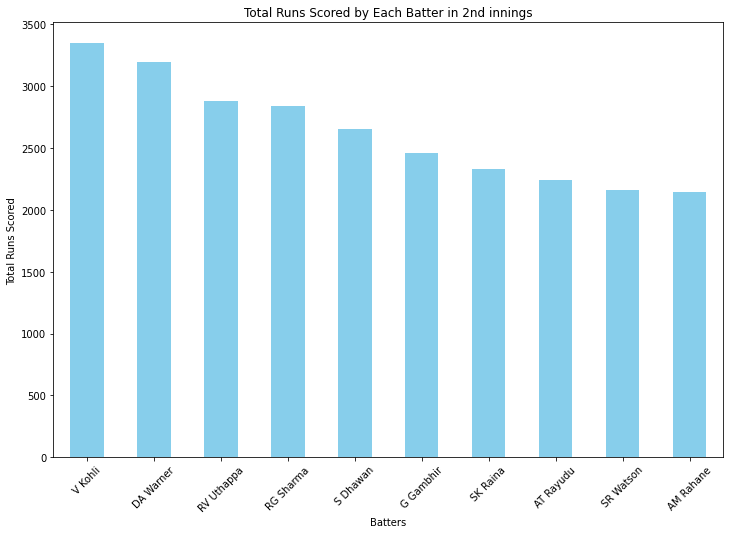

In [29]:
# Grouping data by 'deliveries_batter' and summing 'runs_batter'
runs_by_batter = match_data.groupby('deliveries_batter.1')['runs_batter.1'].sum().sort_values(ascending=False)

# Plotting the aggregated runs for each batter
plt.figure(figsize=(12, 8))
runs_by_batter.head(10).plot(kind='bar', color='skyblue')
plt.xlabel('Batters')
plt.ylabel('Total Runs Scored')
plt.title('Total Runs Scored by Each Batter in 2nd innings')
plt.xticks(rotation=45)
plt.show()

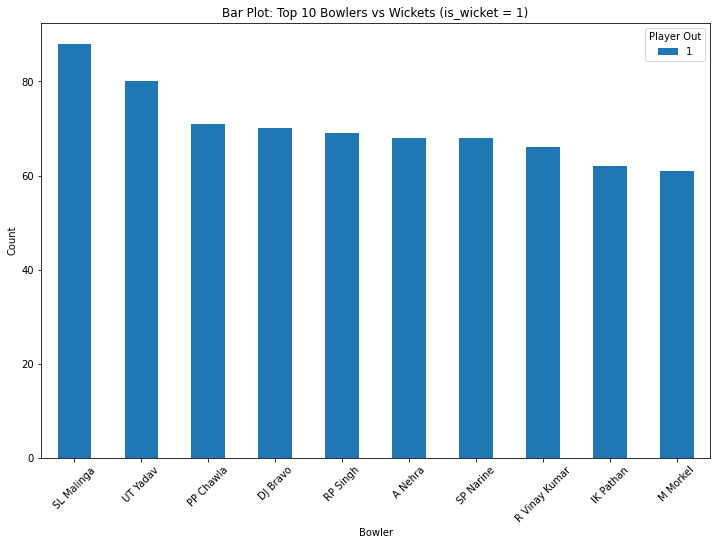

In [28]:
match_data['is_wicket'] = match_data['player_out'].notnull().astype(int)

# Filtering rows where 'is_wicket' is 1
wickets_data = match_data[match_data['is_wicket'] == 1]

# Grouping data by 'bowler' and 'is_wicket', counting occurrences
grouped = wickets_data.groupby(['bowler', 'is_wicket']).size().unstack().fillna(0)

# Summing up the wickets for each bowler and sorting in descending order
summed = grouped.sum(axis=1)
top_10 = summed.nlargest(10).index

# Selecting only the top 10 bowlers
grouped_top_10 = grouped.loc[top_10]

# Plotting bar plot for top 10 bowlers
grouped_top_10.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Bowler')
plt.ylabel('Count')
plt.title('Bar Plot: Top 10 Bowlers vs Wickets in 1st innings')
plt.xticks(rotation=45)
plt.legend(title='Player Out')
plt.show()

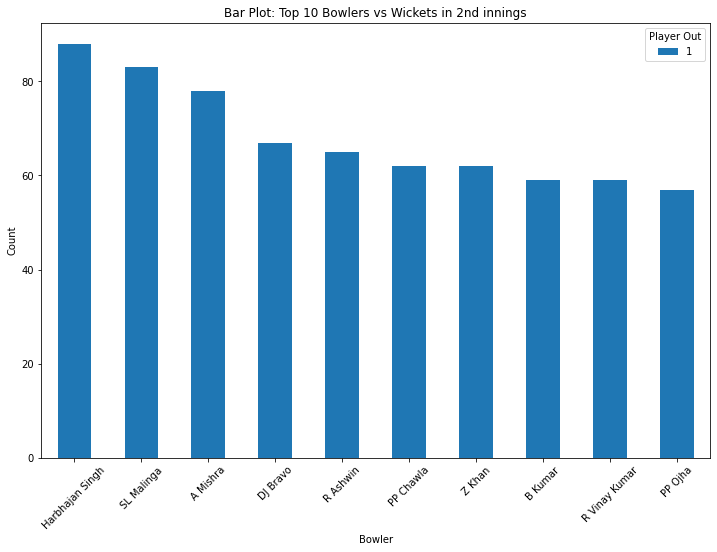

In [30]:
match_data['is_wicket.1'] = match_data['player_out.1'].notnull().astype(int)

# Filtering rows where 'is_wicket' is 1
wickets_data = match_data[match_data['is_wicket.1'] == 1]

# Grouping data by 'bowler' and 'is_wicket', counting occurrences
grouped = wickets_data.groupby(['bowler.1', 'is_wicket.1']).size().unstack().fillna(0)

# Summing up the wickets for each bowler and sorting in descending order
summed = grouped.sum(axis=1)
top_10 = summed.nlargest(10).index

# Selecting only the top 10 bowlers
grouped_top_10 = grouped.loc[top_10]

# Plotting bar plot for top 10 bowlers
grouped_top_10.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Bowler')
plt.ylabel('Count')
plt.title('Bar Plot: Top 10 Bowlers vs Wickets in 2nd innings')
plt.xticks(rotation=45)
plt.legend(title='Player Out')
plt.show()